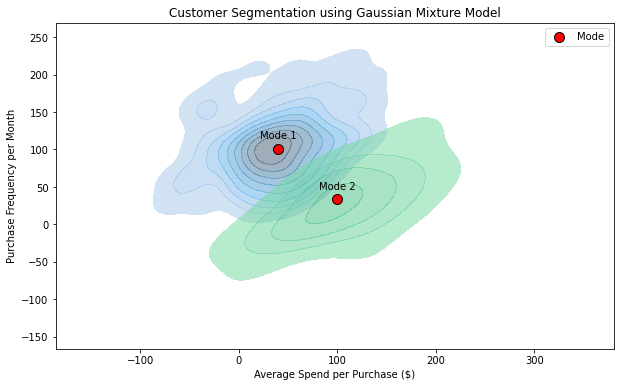

Mode 1: Center at (Average Spend = $39.67, Purchase Frequency = 100.92 per month)
    Estimated range for Average Spend: $-0.06 to $79.41
    Estimated range for Purchase Frequency: 62.08 to 139.77 per month

Mode 2: Center at (Average Spend = $99.87, Purchase Frequency = 33.26 per month)
    Estimated range for Average Spend: $38.48 to $161.26
    Estimated range for Purchase Frequency: -17.96 to 84.48 per month



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

def analyze_customer_behavior(n_modes):
    # Generating synthetic data for demonstration
    np.random.seed(42)
    data, _ = make_blobs(n_samples=300, centers=n_modes, cluster_std=[30, 70], random_state=42,
                         center_box=(10, 100))

    # Creating a DataFrame from the synthetic data
    df_customers = pd.DataFrame(data, columns=['AverageSpend', 'PurchaseFrequency'])

    # Fit the Gaussian Mixture Model with 'n_modes' components (clusters)
    gmm = GaussianMixture(n_components=n_modes, random_state=0).fit(df_customers[['AverageSpend', 'PurchaseFrequency']])
    
    # Predict the cluster for each data point
    df_customers['Cluster'] = gmm.predict(df_customers[['AverageSpend', 'PurchaseFrequency']])

    # Get the coordinates of the cluster centers (modes)
    modes = gmm.means_
    
    # Estimate the range (covariance) around the cluster centers
    covariances = gmm.covariances_

    # Plot the original KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_customers, x='AverageSpend', y='PurchaseFrequency', hue='Cluster', fill=True, palette='viridis', alpha=0.5)

    # Overlay the GMM cluster centers
    plt.scatter(modes[:, 0], modes[:, 1], c='red', s=100, edgecolor='k', label='Mode')
    
    # Annotate the modes on the plot
    for i, (px, py) in enumerate(modes):
        plt.annotate(f'Mode {i+1}', (px, py), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title('Customer Segmentation using Gaussian Mixture Model')
    plt.xlabel('Average Spend per Purchase ($)')
    plt.ylabel('Purchase Frequency per Month')
    plt.legend()
    plt.show()
    
    # Print the modes and their estimated ranges
    for i, (mode, covar) in enumerate(zip(modes, covariances)):
        range_x = (mode[0] - np.sqrt(covar[0, 0]), mode[0] + np.sqrt(covar[0, 0]))
        range_y = (mode[1] - np.sqrt(covar[1, 1]), mode[1] + np.sqrt(covar[1, 1]))
        print(f"Mode {i+1}: Center at (Average Spend = ${mode[0]:.2f}, Purchase Frequency = {mode[1]:.2f} per month)")
        print(f"    Estimated range for Average Spend: ${range_x[0]:.2f} to ${range_x[1]:.2f}")
        print(f"    Estimated range for Purchase Frequency: {range_y[0]:.2f} to {range_y[1]:.2f} per month\n")

# Example usage:
analyze_customer_behavior(n_modes=2)

### Density Plots on Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column 'petal_width' and 'species'.
df = pd.read_csv('Iris.csv')

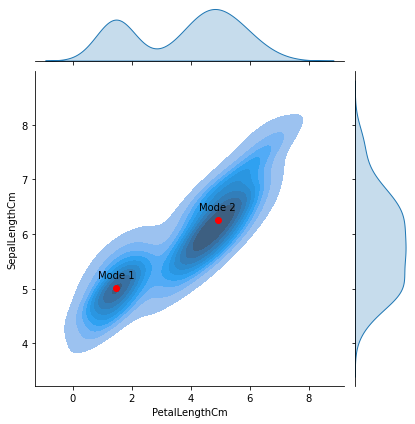

Mode 1 is centered at PetalLengthCm = 1.46 cm and SepalLengthCm = 5.01 cm.
Estimated range for PetalLengthCm around mode 1: 1.29 cm to 1.64 cm
Estimated range for SepalLengthCm around mode 1: 4.66 cm to 5.36 cm
Mode 2 is centered at PetalLengthCm = 4.91 cm and SepalLengthCm = 6.26 cm.
Estimated range for PetalLengthCm around mode 2: 4.08 cm to 5.73 cm
Estimated range for SepalLengthCm around mode 2: 5.60 cm to 6.92 cm


In [3]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

def find_modes_gmm(df, petal_col, sepal_col, n_modes):
    # Prepare the data
    x = df[[petal_col, sepal_col]].values
    
    # Fit the Gaussian Mixture Model with 'n_modes' components (clusters)
    gmm = GaussianMixture(n_components=n_modes, random_state=0).fit(x)
    
    # Predict the cluster for each data point
    labels = gmm.predict(x)
    
    # Get the coordinates of the cluster centers (modes)
    modes = gmm.means_
    
    # Estimate the range (covariance) around the cluster centers
    covariances = gmm.covariances_
    
    # Plot the original KDE plot
    sns.jointplot(x=petal_col, y=sepal_col, data=df, kind="kde", fill=True)
    
    # Overlay the GMM cluster centers
    plt.scatter(modes[:, 0], modes[:, 1], c='red', zorder=10)
    
    # Annotate the modes on the plot
    for i, (px, py) in enumerate(modes):
        plt.annotate(f'Mode {i+1}', (px, py), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()
    
    # Print the modes and their estimated ranges
    for i, (mode, covar) in enumerate(zip(modes, covariances)):
        range_x = (mode[0] - np.sqrt(covar[0, 0]), mode[0] + np.sqrt(covar[0, 0]))
        range_y = (mode[1] - np.sqrt(covar[1, 1]), mode[1] + np.sqrt(covar[1, 1]))
        print(f"Mode {i+1} is centered at {petal_col} = {mode[0]:.2f} cm and {sepal_col} = {mode[1]:.2f} cm.")
        print(f"Estimated range for {petal_col} around mode {i+1}: {range_x[0]:.2f} cm to {range_x[1]:.2f} cm")
        print(f"Estimated range for {sepal_col} around mode {i+1}: {range_y[0]:.2f} cm to {range_y[1]:.2f} cm")

# Example usage:
find_modes_gmm(df, 'PetalLengthCm', 'SepalLengthCm', n_modes=2)

The overall densest point is at petal length = 4.70 cm and sepal length = 6.10 cm.
The densest point in the specified range is at petal length = 1.50 cm and sepal length = 5.00 cm.


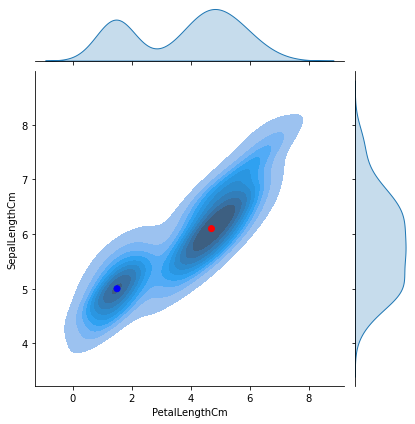

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'df' is your DataFrame and it has 'PetalLengthCm' and 'SepalLengthCm' columns.
# Calculate the point density
x = df['PetalLengthCm']
y = df['SepalLengthCm']
xy = np.vstack([x, y])
kde = gaussian_kde(xy)
z = kde(xy)

# Find the index of the maximum density point
max_density_idx = np.argmax(z)
peak_x1 = x.iloc[max_density_idx]
peak_y1 = y.iloc[max_density_idx]

# Specify the range we are interested in
x_range = (1, 2)  # Petal length range
y_range = (4.5, 5.5)  # Sepal length range

# Filter points within this range
in_range_indices = (x > x_range[0]) & (x < x_range[1]) & (y > y_range[0]) & (y < y_range[1])
filtered_x = x[in_range_indices]
filtered_y = y[in_range_indices]
filtered_xy = np.vstack([filtered_x, filtered_y])
filtered_z = kde(filtered_xy)

# Find the peak within the specified range
if not filtered_z.size == 0:
    range_max_density_idx = np.argmax(filtered_z)
    peak_x2 = filtered_x.iloc[range_max_density_idx]
    peak_y2 = filtered_y.iloc[range_max_density_idx]
else:
    peak_x2, peak_y2 = (np.nan, np.nan)  # No data in the specified range

print(f"The overall densest point is at petal length = {peak_x1:.2f} cm and sepal length = {peak_y1:.2f} cm.")
print(f"The densest point in the specified range is at petal length = {peak_x2:.2f} cm and sepal length = {peak_y2:.2f} cm.")

# Plot the result
joint_plot = sns.jointplot(x='PetalLengthCm', y='SepalLengthCm', data=df, kind="kde", fill=True)
plt.scatter([peak_x1, peak_x2], [peak_y1, peak_y2], color=['red', 'blue'])
plt.show()